# Data set resource
- https://github.com/udacity/CarND-Vehicle-Detection
- http://www.gti.ssr.upm.es/data/Vehicle_database.html
- http://www.cvlibs.net/datasets/kitti/

In [3]:
# Load imports
import numpy as np
import cv2
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
import glob
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Import training dataset of vehicle/non-vehicles
car = glob.glob('data/car/**/*.png')
no_car = glob.glob('data/no car/**/*.png')

In [5]:
len(car)

8792

In [6]:
len(no_car)

8968

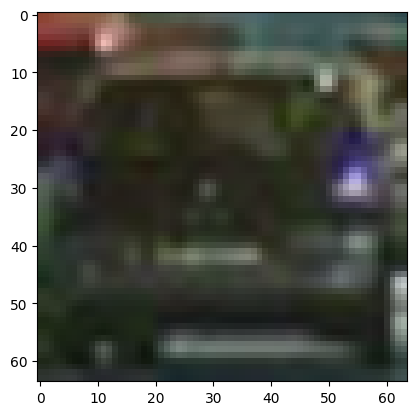

In [7]:
image_color = cv2.imread(car[300])
plt.imshow(image_color)

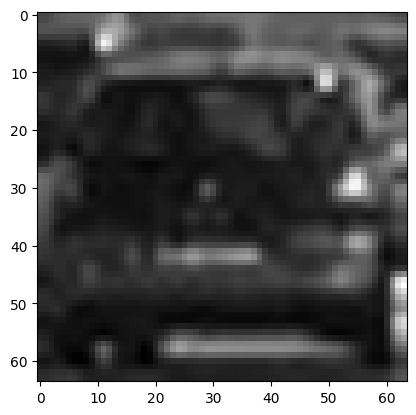

In [8]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')

In [9]:
# Get HOG Features for all training data
'''
HOG stands for Histogram of Oriented Gradients. 
It's a feature descriptor used for object detection and image analysis. 
The primary goal of HOG is to detect objects, particularly by identifying their shape or structure.
'''
car_hog_accum = []
for i in car:
    image_color = mpimg.imread(i)
    image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
    
    features, hog_image = hog(image_gray,
                            orientations = 11, 
                            pixels_per_cell = (16, 16), 
                            cells_per_block = (2, 2), 
                            transform_sqrt = False, 
                            visualize = True, 
                            feature_vector = True)
    car_hog_accum.append(car_hog_accum)



In [ ]:
nocar_hog_accum = []

for i in car:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    car_hog_feature, car_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
                
    car_hog_accum.append(car_hog_feature)


In [10]:
X_car = np.vstack(car_hog_accum).astype(np.float64)

MemoryError: 

In [ ]:
y_car = np.ones(len(X_car))

In [ ]:
X_nocar = np.vstack(nocar_hog_accum).astype(np.float64)

In [ ]:
y_nocar = np.zeros(len(X_nocar))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [ ]:
svc_model = LinearSVC()
svc_model.fit(X_Train, y_train)

In [ ]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

snc.heatmap(cm, annot = True, fmt ="d")